In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
df_raw = pd.read_csv("forestfires.csv")
df_raw.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df_raw.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [4]:
df = df_raw.drop(columns=["month", "day"], axis = 1)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
cols = df.columns
cols

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [6]:
le = LabelEncoder()
df["size_category"] = le.fit_transform(df["size_category"])

In [7]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [8]:
df["size_category"].value_counts(), df.shape

(1    378
 0    139
 Name: size_category, dtype: int64,
 (517, 29))

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(509, 29)

In [11]:
array = df.values

In [12]:
X = array[:,0:28]
Y = array[:,28]
# X,Y

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((407, 28), (102, 28), (407,), (102,))

In [14]:
clf = SVC()
clf.fit(X_train , Y_train)

SVC()

In [15]:
y_pred = clf.predict(X_test)

In [16]:
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 78.43137254901961


array([[ 7, 22],
       [ 0, 73]])

In [17]:
param_grid = {'C': np.arange(0.1,10),
              'gamma': [0.001,0.01,0.1,0.2,0.5,0.9,1,10],
              'kernel': ['rbf', 'linear']}

grid = RandomizedSearchCV(SVC(),param_distributions = param_grid, cv=5, random_state=123, n_jobs=-1)

grid.fit(X_train,Y_train)
print(grid.best_params_)

{'kernel': 'linear', 'gamma': 0.5, 'C': 8.1}


In [18]:
grid.best_params_ 

{'kernel': 'linear', 'gamma': 0.5, 'C': 8.1}

In [19]:
clf1 = SVC(C= 1.1, gamma = 10, kernel='linear')
clf1.fit(X_train , Y_train)

y_pred1 = clf1.predict(X_train)
acc = accuracy_score(Y_train, y_pred1) * 100
print("Accuracy_tr =", acc)
confusion_matrix(Y_train, y_pred1)

y_pred = clf1.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy_tst =", acc)
cm = confusion_matrix(Y_test, y_pred)

Accuracy_tr = 99.75429975429975
Accuracy_tst = 99.01960784313727


<Axes: >

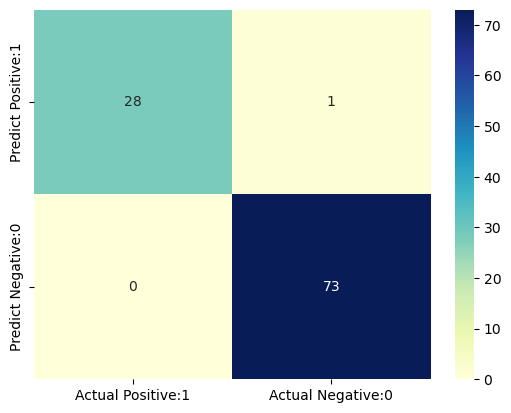

In [20]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')